### KMedoid Implementation
The task is to implement K-Medoid algorithm to cluster the countires dataset consisting of socio-economic and health factors of countries to determine the overall development of the country.

In [2]:
# Importing necessary dependancies
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

### Data Cleaning and Scaling

In [3]:
# Reading the dataset file
df=pd.read_csv('Country_data.csv')
df.set_index('country', inplace=True)

# Scaling and normalising the datapoints
RS=MinMaxScaler()
def scale_data():
    for x in df.columns[0:9]:
        RS.fit(np.array(df[x]).reshape(-1,1))
        df[x]=RS.transform(np.array(df[x]).reshape(-1,1))
        df[x].round(2)
scale_data()

# Defining colours for each cluster label for better visualization
colors=['fuchsia','aqua','gold','brown','gray','black','r','b','g']

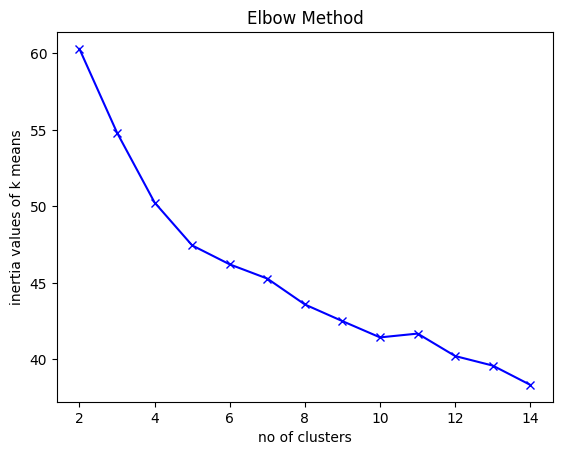

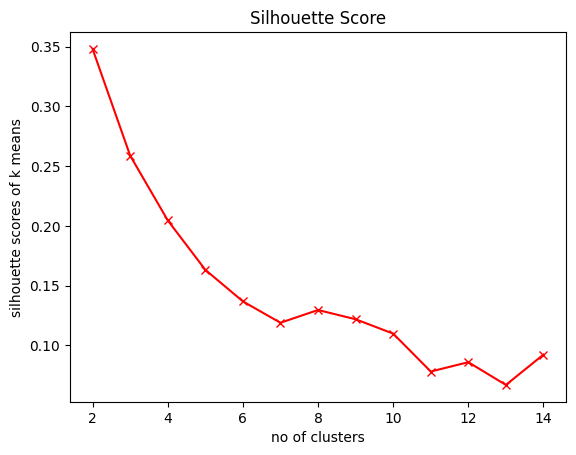

In [4]:
# Finding optimum number of cluster centres using Elbow mwthod and Silhouette score method
def plot_scores():
    SSO={'silhouette_score':[],'elbow':[]}
    for i in range(2,15):
        kmedoid=KMedoids(n_clusters=i)
        a=kmedoid.fit_predict(df[df.columns[0:9]])
        SSO['elbow'].append(kmedoid.inertia_)
        SSO['silhouette_score'].append(silhouette_score(df[df.columns[0:9]],a))
    
    # Elbow Method plot
    plt.title('Elbow Method')
    plt.plot(list(range(2,15)),SSO['elbow'],marker='x',color='b',label='elbow')
    plt.xlabel('no of clusters')
    plt.ylabel('inertia values of k means')
    plt.show()
    
    # Silhouette Score plot
    plt.title('Silhouette Score')
    plt.plot(list(range(2,15)),SSO['silhouette_score'],marker='x',color='r',label='silhouette_score')
    plt.xlabel('no of clusters')
    plt.ylabel('silhouette scores of k means')
    plt.show()
plot_scores()

### Finding Centroids using KMedoids

In [5]:
def kmedoids_library():
    Kmedoids=KMedoids(n_clusters=3)
    Kmedoids.fit(df[df.columns[0:9]])
    clusters_list=Kmedoids.predict(df[df.columns[0:9]])
    centroid=Kmedoids.cluster_centers_.round(2)
    return clusters_list,centroid

clusters_list,centroid=kmedoids_library()
number_of_clusters=3

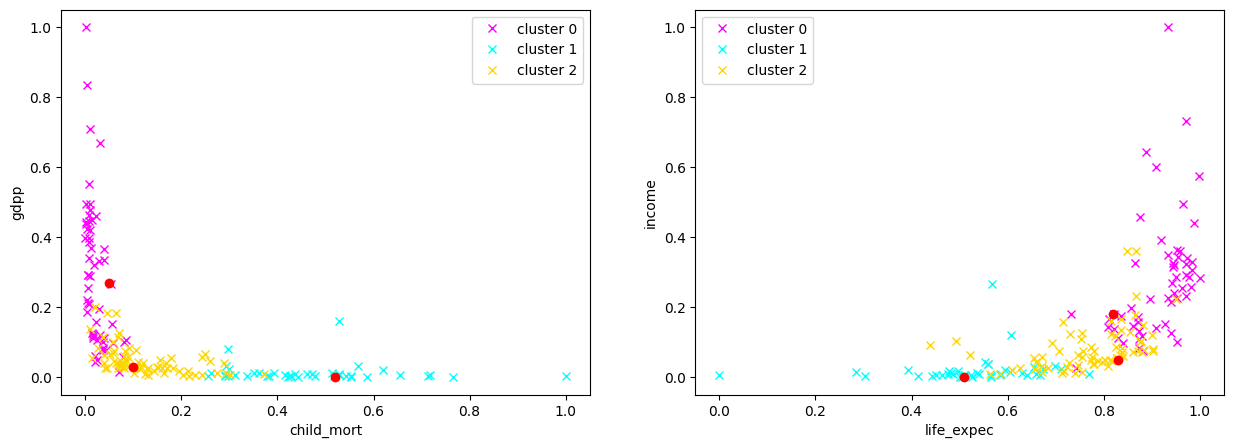

In [7]:
# Results
def plot():
    df['cluster']=clusters_list
    fig, axs=plt.subplots(1,2,figsize=(15,5))
    cluster=[0,1,2]
    
    for k in range(number_of_clusters):
        axs[0].plot(df[df['cluster']==cluster[k]]['child_mort'], df[df['cluster']==cluster[k]]['gdpp'],'x',color=colors[k],label=f'cluster {cluster[k]}')
        axs[1].plot(df[df['cluster']==cluster[k]]['life_expec'],df[df['cluster']==cluster[k]]['income'],'x',color=colors[k],label=f'cluster {cluster[k]}')
    
    axs[0].plot(centroid[:,0],centroid[:,8],'o',color='r')
    axs[1].plot(centroid[:,6],centroid[:,4],'o',color='r')
    axs[0].set_xlabel('child_mort')
    axs[0].set_ylabel('gdpp')
    axs[1].set_xlabel('life_expec')
    axs[1].set_ylabel('income')
    axs[0].legend()
    axs[1].legend()
    plt.show()
plot()

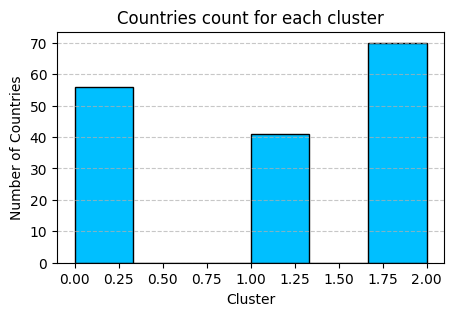

In [15]:
# Countries per cluster plot
plt.figure(figsize=(5, 3))
plt.hist(np.sort(df['cluster']), bins=6, color='deepskyblue', edgecolor='black')
plt.title('Countries count for each cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
# Observations:
# cluster 1: high child_mort, very low life_expec, income and gdpp with all other coinsiding features --> Underdeveloped Countries

# cluster 2: Normal child_mort, Normal Low life_expec, income and gdpp along with all othercoinsiding featuers --> developing countries.

# cluster 0: Low child_mort, High life_expec, income and gdpp along with all other coinsiding featuers --> developed countries.

In [24]:
df['Nation status']=' '
df.loc[df['cluster']==1,'Nation status']='underdeveloped'
df.loc[df['cluster']==2,'Nation status']='developing'
df.loc[df['cluster']==0,'Nation status']='developed'

df.reset_index(inplace=True)
np.array(df[df['Nation status']=='developing']['country'])

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Botswana', 'Bulgaria', 'Cambodia', 'Cape Verde',
       'China', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Libya',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Mongolia', 'Morocco', 'Myanmar',
       'Namibia', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Samoa', 'Saudi Arabia', 'Seychelles',
       'Solomon Islands', 'South Africa', 'Sri Lanka',
       'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan',
       'Thailand', 'Tonga', 'Tunisia', 'Turkmenistan', 'Ukraine',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam'], dtype=object)

In [25]:
np.array(df[df['Nation status']=='developed']['country'])

array(['Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain',
       'Barbados', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania',
       'Luxembourg', 'Moldova', 'Montenegro', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russia', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay'], dtype=object)

In [26]:
np.array(df[df['Nation status']=='underdeveloped']['country'])

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)

In [27]:
# Reading data from Kmeans file (generated in kmeans assingment) and copying result into Kmeans_Kmedoids.csv for better understanding and doing comparison between both methods.
dfcopy=pd.read_csv('Country_data_Kmeans.csv')
display(dfcopy)
dfcopy['KMedoids Nation Status']=df['Nation status']
dfcopy.to_csv('country_data_Kmeans_Kmedoids.csv')

,Unnamed: 0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans Nation status
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,under-developed
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,under-developed
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing
...,...,...,...,...,...,...,...,...,...,...,...,...
162,162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,developing
163,163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,developing
164,164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,developing
165,165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,under-developed


In [35]:
# Detaile analysis between both clustering methods
df_final=pd.read_csv('country_data_Kmeans_Kmedoids.csv')
matched_list=np.where(df_final['Kmeans Nation status']!=df_final['KMedoids Nation Status'])
del(df_final['Unnamed: 0'])
# del(df_final['Unnamed: 0.1'])
df_final.to_csv('country_data_Kmeans_Kmedoids.csv')

In [32]:
# Prinitng indices where the values in the 'Kmeans Nation status' column do not match the values in the 'KMedoids Nation Status' column
np.where(df_final['Kmeans Nation status']!=df_final['KMedoids Nation Status'])

(array([  0,   3,   5,  10,  13,  17,  20,  22,  25,  26,  28,  31,  32,
         33,  35,  36,  37,  38,  39,  40,  41,  49,  50,  55,  56,  59,
         63,  64,  66,  67,  72,  80,  81,  84,  85,  86,  87,  88,  90,
         93,  94,  97,  98,  99, 102, 104, 106, 108, 112, 113, 116, 121,
        124, 125, 126, 129, 130, 132, 136, 142, 147, 149, 150, 153, 155,
        160, 165, 166], dtype=int64),)

In [33]:
# Final and Cleaned dataframe
df_final.drop(df_final[df_final.columns[1:10]],axis=1,inplace=True)
df_final.iloc[[0,   3,   5,  10,  13,  17,  20,  22,  25,  26,  28,  31,  32,
         33,  35,  36,  37,  38,  39,  40,  41,  49,  50,  55,  56,  59,
         63,  64,  66,  67,  72,  80,  81,  84,  85,  86,  87,  88,  90,
         93,  94,  97,  98,  99, 102, 104, 106, 108, 112, 113, 116, 121,
        124, 125, 126, 129, 130, 132, 136, 142, 147, 149, 150, 153, 155,
        160, 165, 166],:]

,country,Kmeans Nation status,KMedoids Nation Status
0,Afghanistan,under-developed,underdeveloped
3,Angola,under-developed,underdeveloped
5,Argentina,developing,developed
10,Bahamas,developing,developed
13,Barbados,developing,developed
...,...,...,...
153,Turkey,developing,developed
155,Uganda,under-developed,underdeveloped
160,Uruguay,developing,developed
165,Yemen,under-developed,underdeveloped
